<a href="https://colab.research.google.com/github/Computer-CGuy/Simulating_COVID-19_Spread/blob/master/COVID-19_Spread_Without_Measures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

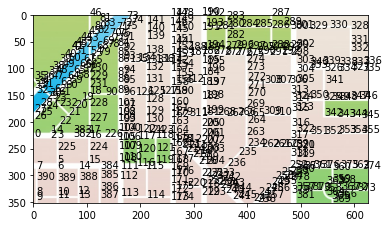

[Infected:- 5 Died:- 0 Recovered:- 0]
[Infected:- 58 Died:- 0 Recovered:- 0]
[Infected:- 293 Died:- 0 Recovered:- 2]
[Infected:- 504 Died:- 0 Recovered:- 9]
[Infected:- 672 Died:- 0 Recovered:- 15]
[Infected:- 738 Died:- 0 Recovered:- 29]
[Infected:- 820 Died:- 0 Recovered:- 38]
[Infected:- 835 Died:- 0 Recovered:- 48]
[Infected:- 827 Died:- 3 Recovered:- 86]
[Infected:- 774 Died:- 4 Recovered:- 146]
[Infected:- 734 Died:- 7 Recovered:- 190]
[Infected:- 696 Died:- 11 Recovered:- 231]
[Infected:- 668 Died:- 13 Recovered:- 262]
[Infected:- 600 Died:- 15 Recovered:- 331]
[Infected:- 524 Died:- 17 Recovered:- 407]
[Infected:- 447 Died:- 17 Recovered:- 484]
[Infected:- 355 Died:- 20 Recovered:- 576]
[Infected:- 252 Died:- 26 Recovered:- 679]
[Infected:- 176 Died:- 29 Recovered:- 755]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:260: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


[Infected:- 115 Died:- 30 Recovered:- 816]
[Infected:- 89 Died:- 33 Recovered:- 842]
[Infected:- 56 Died:- 34 Recovered:- 875]
[Infected:- 45 Died:- 35 Recovered:- 886]
[Infected:- 34 Died:- 35 Recovered:- 897]
[Infected:- 32 Died:- 35 Recovered:- 899]
[Infected:- 30 Died:- 35 Recovered:- 901]
[Infected:- 30 Died:- 35 Recovered:- 901]
[Infected:- 29 Died:- 35 Recovered:- 902]
[Infected:- 27 Died:- 35 Recovered:- 904]
[Infected:- 26 Died:- 35 Recovered:- 905]
[5, 58, 293, 504, 672, 738, 820, 835, 827, 774, 734, 696, 668, 600, 524, 447, 355, 252, 176, 115, 89, 56, 45, 34, 32, 30, 30, 29, 27, 26]
[0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 7, 11, 13, 15, 17, 17, 20, 26, 29, 30, 33, 34, 35, 35, 35, 35, 35, 35, 35, 35]
[0, 0, 2, 9, 15, 29, 38, 48, 86, 146, 190, 231, 262, 331, 407, 484, 576, 679, 755, 816, 842, 875, 886, 897, 899, 901, 901, 902, 904, 905]


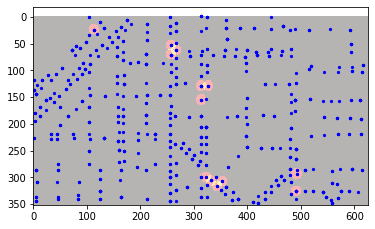

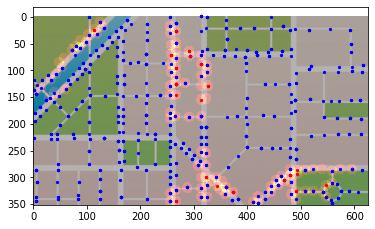

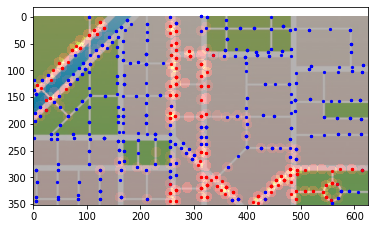

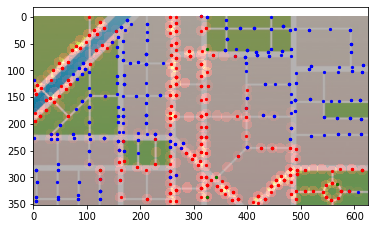

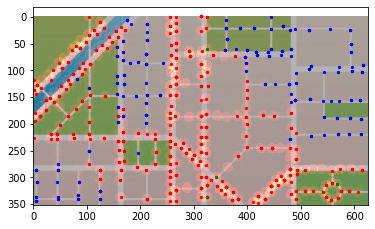

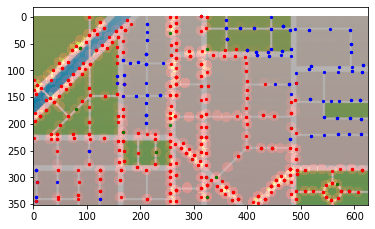

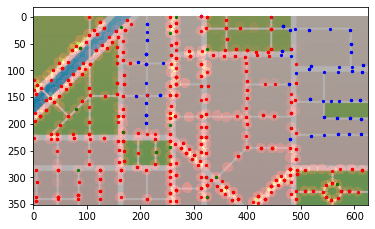

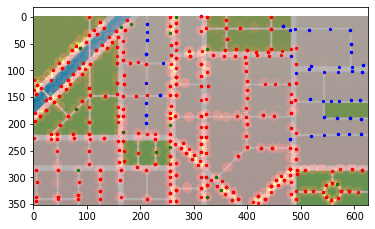

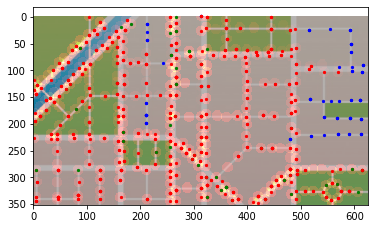

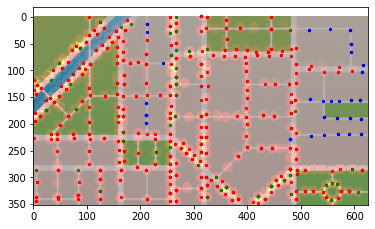

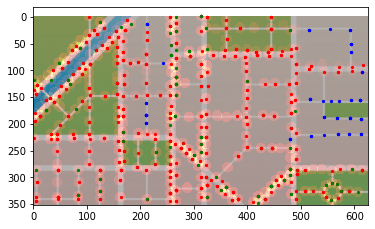

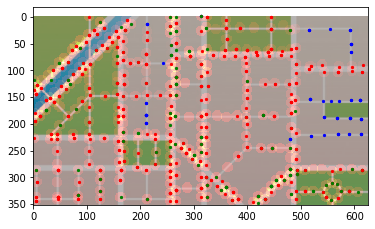

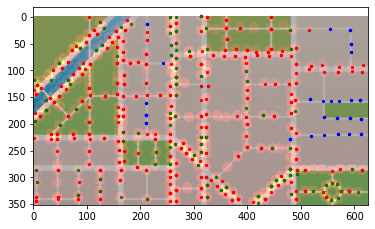

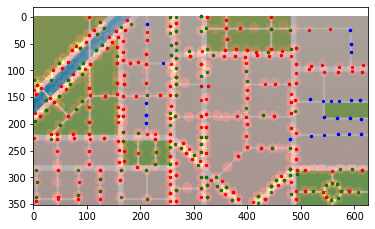

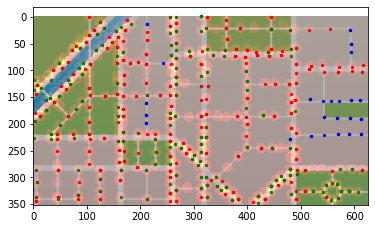

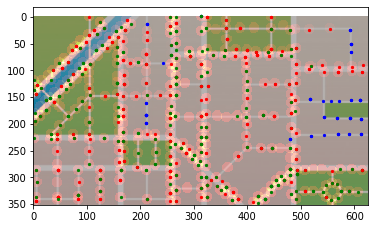

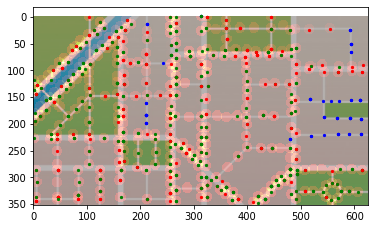

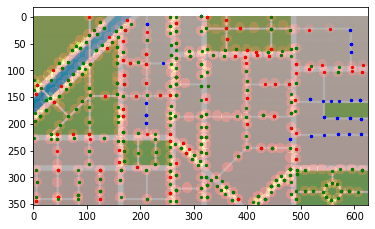

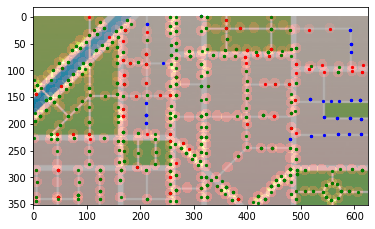

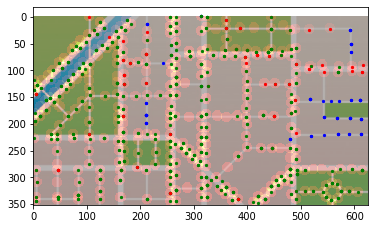

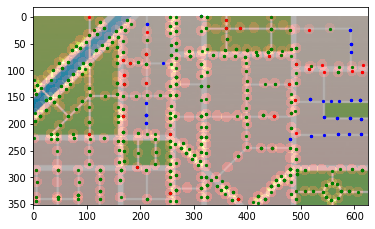

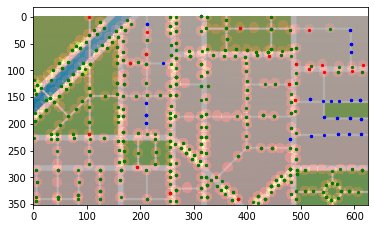

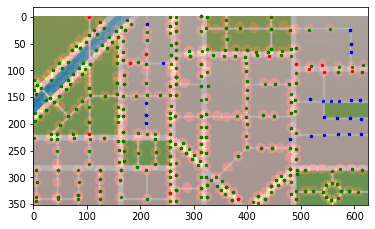

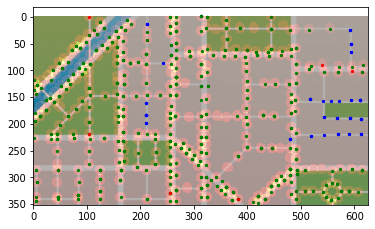

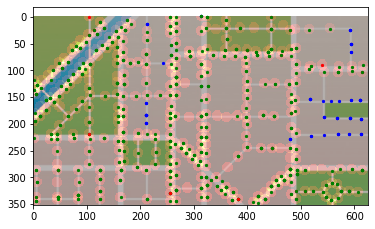

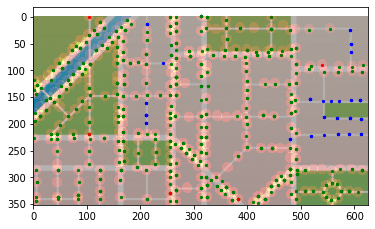

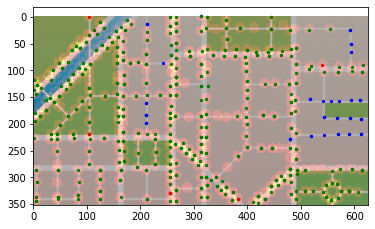

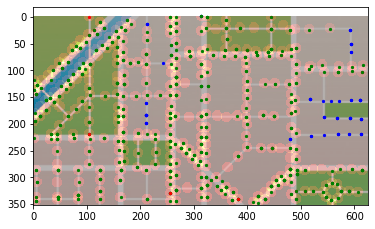

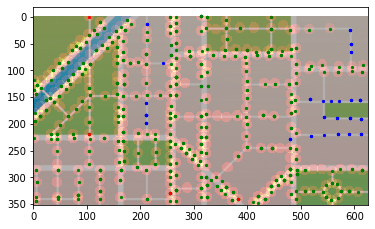

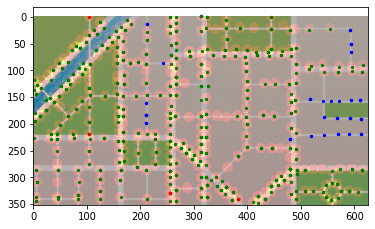

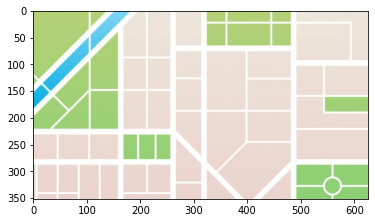

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

random.seed(669899879787987667)



ix = []
iy = []
def onclick(event):
    global ix, iy
    if(event.xdata==None or event.ydata==None):
        return
    ix.append(int(event.xdata))
    iy.append(int(event.ydata))
    print([int(event.xdata),int(event.ydata)])
    # plt.clf()
    plt.scatter(int(event.xdata),int(event.ydata)); #inform matplotlib of the new data
    plt.draw()
    return

class GoPoints:

    def __init__(self, x,y,name):
        self.forwardArray = []
        self.x = x
        self.y = y
        self.name = name
    def __str__(self):
        return self.name
    def append(self,point):
        if(type(point)==list):
            self.forwardArray+=point
        else:
            self.forwardArray.append(point)
    def forward(self):
        # print("Len: "+str(len(self.forwardArray)))
        # print(str(self.name))
        pt = random.choice(self.forwardArray)
        # print(type(pt))
        # print(self.forwardArray)

        # if(type(pt)==int):
        # print(random.choice(self.forwardArray).cords())
        return pt
    def len(self):
        return len(self.forwardArray)
    def cords(self):
        return [self.x,self.y]
class Person:
    def __init__(self, startPoint=None,infected = False):
        self.walked = []
        self.days = 0
        self.died = False
        # c = [True,False,False,False,False,False,False] 
        self.infected = False
        self.immune= False
        self.stop = False
        # self.recoveable = False
        if(startPoint==None):
            global pts
            pt = random.choice(pts)
            self.point = pt
            self.walked.append(str(self.point))
        else:
            self.point = startPoint
    def nday(self):
        if(self.infected):
            self.days-=1
        if(days==0):
            return
        if(self.infected):
            c = [False,False,False,True,False,False,False,False,False,False] ## 10% Recovery Rate
            saved = random.choice(c)
            if(saved):
                # print("Immuned by random")
                self.immune = True
                self.infected = False
    def update(self):
        if(self.died):
            return
        if(self.immune):
            return
        
        # print(self.days)
        # print(days!=30)
        if(self.infected):
            if(self.days==0):
                c = [True,True,True,True,True,True,True,False] ## 6:1 Recover to Death
                saved = random.choice(c)
                if(saved):
                    self.immune = True
                    self.infected = False
                    # print("Immuned by Days")
                else:
                    self.died = True
                    # self.immune = True
                    self.immune = False
                    self.infected = False
        
        if(self.infected):
            if(not self.stop):
                c = [True,True,False,False,False,False,False,False,False,False] ## 80% Donot Feel
                self.stop = random.choice(c)
            if(not self.stop):
                point = self.point.forward()
                self.point = point
                self.walked.append(str(self.point))

    def __str__(self):
        return str(self.point)
    def cords(self):
        return self.point.cords()
    def infected(self):
        if(self.immune):
            return False
        return self.infected
    def setinfected(self,_):
        if(self.infected==True):
            return
        if(not self.immune or not self.died):
            self.days = random.randint(7,20)
            self.infected = True
class Virus:
    def __init__(self, cords):
        self.infection = True
        self.day = random.randint(0,10)
        self.pt = cords
        c = [True,False]
        self.infection = True
    def InfectMe(self,cords):
        # c = [True,False]
        global grid
        if(grid[cords[1],cords[0]]>=0.2):
            return True
        else:
            return False
        # if(self.pt== cords):
        # return random.choice(c)
    def update(self):
        self.day-=1
        if(day==0):
            self.infection = False
    def nday(self):
        c = [True,False,False] # 1/3 
        self.infection = random.choice(c)
    def show(self):
        if(v.infection):
            drawCircle(self.pt[0],self.pt[1])
img = cv2.imread("city.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grid = np.zeros([img.shape[0],img.shape[1]])
# print(img.shape)
# STOP
# grid[:] = np.nan
# fig, ax = plt.subplots()
# ax.imshow(img)

# cid = fig.canvas.mpl_connect('button_press_event', onclick)
# plt.show()
# print(ix)
# print(iy)
ix = [1, 33, 32, 44, 44, 45, 45, 5, 5, 5, 45, 45, 83, 84, 84, 104, 105, 104, 106, 91, 79, 65, 49, 39, 23, 13, 2, 2, 13, 23, 30, 14, 5, 1, 7, 1, 16, 27, 36, 48, 58, 72, 72, 79, 88, 103, 104, 33, 42, 54, 64, 77, 87, 99, 106, 106, 97, 91, 81, 69, 60, 47, 39, 51, 64, 74, 85, 93, 117, 129, 141, 154, 163, 174, 183, 171, 158, 147, 137, 121, 113, 124, 119, 131, 156, 156, 156, 156, 156, 156, 134, 167, 168, 168, 169, 169, 168, 168, 168, 168, 167, 158, 158, 158, 160, 158, 167, 160, 160, 169, 169, 163, 161, 163, 212, 211, 194, 196, 228, 228, 195, 230, 196, 228, 212, 213, 191, 236, 211, 211, 211, 211, 211, 211, 196, 181, 228, 243, 211, 212, 212, 212, 257, 257, 257, 256, 255, 256, 266, 266, 267, 267, 267, 267, 266, 266, 266, 257, 256, 255, 257, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 267, 266, 266, 266, 265, 265, 266, 314, 314, 313, 314, 314, 314, 292, 291, 316, 314, 314, 324, 323, 324, 324, 324, 327, 323, 323, 323, 323, 323, 323, 323, 314, 314, 314, 314, 312, 301, 290, 280, 276, 286, 297, 308, 314, 314, 314, 288, 322, 324, 324, 104, 44, 132, 104, 104, 104, 104, 104, 49, 342, 399, 382, 363, 332, 344, 350, 359, 371, 353, 360, 374, 382, 411, 420, 433, 444, 453, 463, 479, 480, 469, 458, 444, 433, 419, 480, 461, 446, 425, 397, 399, 397, 381, 361, 344, 397, 399, 399, 399, 397, 397, 396, 376, 356, 336, 359, 360, 341, 361, 360, 386, 412, 444, 444, 445, 467, 418, 440, 463, 465, 438, 416, 378, 399, 481, 481, 480, 489, 491, 491, 491, 491, 478, 451, 432, 429, 449, 291, 283, 481, 482, 482, 482, 480, 480, 491, 491, 491, 491, 489, 489, 542, 544, 595, 592, 516, 554, 593, 593, 515, 569, 615, 616, 595, 571, 540, 518, 545, 544, 568, 591, 612, 610, 593, 571, 556, 517, 518, 544, 569, 590, 613, 493, 491, 541, 558, 558, 523, 595, 547, 547, 557, 569, 575, 568, 558, 522, 507, 590, 606, 615, 574, 539, 507, 482, 482, 492, 491, 75, 74, 125, 125, 125, 125, 85, 44, 6]
iy = [227, 219, 229, 228, 219, 275, 286, 286, 336, 344, 336, 341, 334, 341, 286, 275, 229, 219, 147, 158, 172, 186, 203, 159, 174, 185, 194, 180, 168, 156, 151, 134, 145, 136, 128, 119, 119, 109, 100, 86, 77, 62, 62, 55, 45, 34, 0, 118, 107, 95, 84, 71, 58, 48, 71, 88, 98, 106, 116, 126, 135, 149, 142, 129, 118, 107, 95, 86, 62, 53, 38, 26, 19, 6, 14, 24, 37, 47, 59, 73, 24, 10, 32, 20, 56, 73, 87, 111, 123, 145, 148, 45, 65, 80, 108, 125, 149, 172, 185, 198, 216, 169, 185, 196, 216, 233, 233, 249, 272, 250, 270, 287, 305, 337, 340, 286, 281, 230, 228, 276, 254, 253, 218, 219, 219, 146, 148, 147, 161, 183, 198, 123, 102, 88, 85, 87, 87, 87, 69, 43, 28, 13, 89, 71, 53, 31, 18, 1, 0, 11, 27, 49, 62, 77, 95, 112, 125, 103, 129, 147, 166, 179, 190, 203, 220, 233, 243, 261, 275, 288, 299, 312, 329, 344, 344, 324, 296, 273, 237, 186, 146, 186, 155, 129, 110, 89, 72, 73, 64, 64, -1, 27, 0, 20, 61, 91, 104, 129, 153, 182, 206, 224, 238, 255, 278, 206, 224, 238, 252, 269, 258, 247, 236, 246, 254, 265, 278, 300, 320, 336, 319, 299, 314, 336, 251, 251, 227, 196, 169, 119, 104, 134, 168, 300, 244, 261, 281, 306, 316, 323, 331, 342, 307, 318, 328, 340, 346, 335, 327, 316, 305, 297, 285, 295, 306, 314, 328, 341, 348, 246, 246, 246, 246, 223, 201, 188, 185, 187, 185, 170, 151, 136, 120, 101, 87, 75, 74, 74, 72, 62, 21, 24, 42, 6, 21, 21, 22, 0, 61, 17, 72, 73, 72, 64, 65, 65, 61, 62, 74, 61, 25, 23, 59, 89, 105, 123, 126, 125, 125, 184, 186, 187, 124, 144, 160, 179, 207, 229, 263, 265, 248, 248, 217, 176, 156, 157, 104, 101, 25, 24, 22, 51, 66, 98, 104, 104, 91, 93, 93, 90, 92, 125, 188, 190, 190, 191, 155, 155, 157, 157, 153, 222, 221, 219, 219, 219, 286, 325, 327, 310, 288, 285, 285, 315, 336, 342, 339, 326, 313, 349, 325, 325, 325, 327, 287, 285, 285, 286, 308, 331, 293, 340, 227, 219, 287, 304, 325, 340, 308, 309, 308]

# iy = [197, 226, 163, 212, 137, 241, 275, 215]

fig, ax = plt.subplots()
ax.imshow(img)
# ax.scatter(ix,iy)

pts = []
for x,y in zip(ix,iy):
    pts.append(GoPoints(x,y,str(len(pts))))
    ax.annotate(str(pts[-1]), (x, y))
plt.show()

# pts[0].append(point = [pts[1],pts[2]])
# plt.show()
def Distance(x,y,x1,y2):
    return ((x-x1)**2 + (y-y2)**2)**(1/2)
def drawCircle(x,y,r = 10):
    global grid
    for X in range(grid.shape[0]):
        for Y in range(grid.shape[1]):
            # print(Distance(X,Y,x,y))
            d = Distance(Y,X,x,y)
            if(d<r):
                grid[X][Y]+=0.2

initMarkers()
# STOP
population = 1000
color = ["b","g","r","c","m","y","b","w"]
Viruses = []
color = {}
color["infected"]="r"
color["recovered"]="g"
color["safe"]="b"
      
days = 30
people = []
for p in range(population):
    people.append(Person())
people[0].infected = True
people[2].infected = True
people[4].infected = True
people[120].infected = True
people[80].infected = True

Infected = []
Died = []
Recovered = []
for day in range(days):
    for p in range(population):
        # i = Person()
        i = people[p]
        i.nday()
        steps_taken_by_person = random.randint(20,100)
        for u in range(steps_taken_by_person):
            random.seed(int(random.random()*1000))
            # print(i)
            i.update()
            # i.days-=1
            # print(i)

            for v in Viruses:
                if(v.InfectMe(i.cords())):
                    i.setinfected(True)
                    break
            coords = (i.cords())
            done = False
            if(i.infected):
                # print("Infected: "+str(i))
                if(i.immune):
                    i.infected = False
                for v in Viruses:
                    if(v.pt==i.cords()):
                        v.infected = True
                        done = True
                        break
                if(not done):
                    Viruses.append(Virus(coords))
                # drawCircle(coords[0],coords[1])
            
        if(i.infected):
            plt.scatter(coords[0],coords[1],s=5,color=color["infected"])
        elif(i.immune):
            plt.scatter(coords[0],coords[1],s=5,color=color["recovered"])
        else:
            plt.scatter(coords[0],coords[1],s=5,color=color["safe"])
    for v in Viruses:
        # print(v.infection)
        v.show()
        v.update()
    # Viruses = [s for s in Viruses if v.infection]
    plt.imshow(grid,alpha = 0.3, cmap='hot', interpolation='nearest')
    fig, ax = plt.subplots()
    ax.imshow(img)
    inf=0
    dead= 0
    rec = 0
    # Infected = []
    # Died = []
    # Recovered = []
    for p in range(population):
        if(people[p].infected==True):
            inf+=1
        if(people[p].died==True):
            dead+=1
        if(people[p].immune==True):
            rec+=1
        
    Infected.append(inf)
    Died.append(dead)
    Recovered.append(rec)
    print("[Infected:- "+str(inf)+" Died:- "+str(dead)+" Recovered:- "+str(rec)+"]")
print(Infected)
print(Died)
print(Recovered)

plt.show()


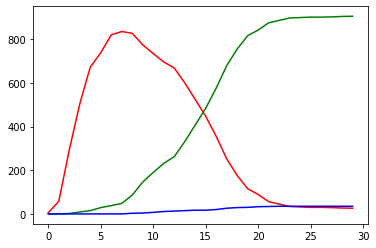

In [50]:
color["infected"]="r"
color["recovered"]="g"
color["safe"]="b"
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

X = np.arange(0,30)
plt.plot(X,Infected,c=color["infected"])
plt.plot(X,Recovered,c=color["recovered"])
plt.plot(X,Died,c = color["safe"])
# plt.show()
plt.savefig("curve.png")

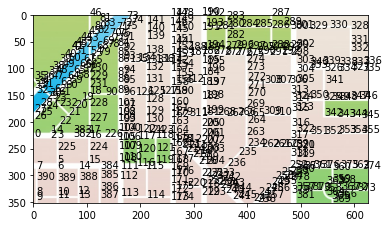

[Count:- 0]
[Count:- 9]
[Count:- 26]
[Count:- 51]
[Count:- 87]
[Count:- 132]
[Count:- 164]
[Count:- 167]


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

random.seed(669899879787987667)



ix = []
iy = []
def onclick(event):
    global ix, iy
    if(event.xdata==None or event.ydata==None):
        return
    ix.append(int(event.xdata))
    iy.append(int(event.ydata))
    print([int(event.xdata),int(event.ydata)])
    # plt.clf()
    plt.scatter(int(event.xdata),int(event.ydata)); #inform matplotlib of the new data
    plt.draw()
    return

class GoPoints:

    def __init__(self, x,y,name):
        self.forwardArray = []
        self.x = x
        self.y = y
        self.name = name
    def __str__(self):
        return self.name
    def append(self,point):
        if(type(point)==list):
            self.forwardArray+=point
        else:
            self.forwardArray.append(point)
    def forward(self):
        # print("Len: "+str(len(self.forwardArray)))
        # print(str(self.name))
        pt = random.choice(self.forwardArray)
        # print(type(pt))
        # print(self.forwardArray)

        # if(type(pt)==int):
        # print(random.choice(self.forwardArray).cords())
        return pt
    def cords(self):
        return [self.x,self.y]
class Person:
    def __init__(self, startPoint=None,infected = False):
        self.walked = []
        # c = [True,False,False,False,False,False,False] 
        self.infected = False
        self.immune= False
        # self.recoveable = False
        if(startPoint==None):
            global pts
            pt = random.choice(pts)
            self.point = pt
            self.walked.append(str(self.point))
        else:
            self.point = startPoint
    def update(self):
        c = [True,True,True,False,False,False,False,False,False,False] ## 30% Recovery Rate
        saved = random.choice(c)
        if(saved and self.infected):
            self.immune = True
            self.infected = False

        point = self.point.forward()
        #while str(point not in  self.walked):
        #point = self.point.forward()
        self.point = point
        self.walked.append(str(self.point))

    def __str__(self):
        return str(self.point)
    def cords(self):
        return self.point.cords()
    def infected(self):
        if(self.immune):
            return False
        return self.infected
# '''class Person:
#     def __init__(self, startPoint=None,infected = False):
#         self.walked = []
#         c = [True,False,False,False]
#         self.infected = random.choice(c)
#         if(startPoint==None):
#             global pts
#             pt = random.choice(pts)
#             self.point = pt
#             self.walked.append(str(self.point))
#         else:
#             self.point = startPoint
#     def update(self):
        

#         point = self.point.forward()
#         #while str(point not in self.walked):
#         #point = self.point.forward()
#         self.point = point
#         self.walked.append(str(self.point))

#     def __str__(self):
#         return str(self.point)
#     def cords(self):
#         return self.point.cords()
#     def infected(self):
#         return self.infected
class Virus:
    def __init__(self, cords):
        self.infection = True
        self.day = random.randint(0,10)
        self.pt = cords
        c = [True,False]
        self.infection = True
    def InfectMe(self,cords):
        # c = [True,False]
        global grid
        if(grid[cords[1],cords[0]]>=0.2):
            return True
        else:
            return False
        # if(self.pt== cords):
        # return random.choice(c)
    def update(self):
        self.day-=1
        if(day==0):
            self.infection = False
    def show(self):
        if(v.infection):
            drawCircle(self.pt[0],self.pt[1])
img = cv2.imread("city.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grid = np.zeros([img.shape[0],img.shape[1]])
# print(img.shape)
# STOP
# grid[:] = np.nan
# fig, ax = plt.subplots()
# ax.imshow(img)

# cid = fig.canvas.mpl_connect('button_press_event', onclick)
# plt.show()
# print(ix)
# print(iy)
ix = [1, 33, 32, 44, 44, 45, 45, 5, 5, 5, 45, 45, 83, 84, 84, 104, 105, 104, 106, 91, 79, 65, 49, 39, 23, 13, 2, 2, 13, 23, 30, 14, 5, 1, 7, 1, 16, 27, 36, 48, 58, 72, 72, 79, 88, 103, 104, 33, 42, 54, 64, 77, 87, 99, 106, 106, 97, 91, 81, 69, 60, 47, 39, 51, 64, 74, 85, 93, 117, 129, 141, 154, 163, 174, 183, 171, 158, 147, 137, 121, 113, 124, 119, 131, 156, 156, 156, 156, 156, 156, 134, 167, 168, 168, 169, 169, 168, 168, 168, 168, 167, 158, 158, 158, 160, 158, 167, 160, 160, 169, 169, 163, 161, 163, 212, 211, 194, 196, 228, 228, 195, 230, 196, 228, 212, 213, 191, 236, 211, 211, 211, 211, 211, 211, 196, 181, 228, 243, 211, 212, 212, 212, 257, 257, 257, 256, 255, 256, 266, 266, 267, 267, 267, 267, 266, 266, 266, 257, 256, 255, 257, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 267, 266, 266, 266, 265, 265, 266, 314, 314, 313, 314, 314, 314, 292, 291, 316, 314, 314, 324, 323, 324, 324, 324, 327, 323, 323, 323, 323, 323, 323, 323, 314, 314, 314, 314, 312, 301, 290, 280, 276, 286, 297, 308, 314, 314, 314, 288, 322, 324, 324, 104, 44, 132, 104, 104, 104, 104, 104, 49, 342, 399, 382, 363, 332, 344, 350, 359, 371, 353, 360, 374, 382, 411, 420, 433, 444, 453, 463, 479, 480, 469, 458, 444, 433, 419, 480, 461, 446, 425, 397, 399, 397, 381, 361, 344, 397, 399, 399, 399, 397, 397, 396, 376, 356, 336, 359, 360, 341, 361, 360, 386, 412, 444, 444, 445, 467, 418, 440, 463, 465, 438, 416, 378, 399, 481, 481, 480, 489, 491, 491, 491, 491, 478, 451, 432, 429, 449, 291, 283, 481, 482, 482, 482, 480, 480, 491, 491, 491, 491, 489, 489, 542, 544, 595, 592, 516, 554, 593, 593, 515, 569, 615, 616, 595, 571, 540, 518, 545, 544, 568, 591, 612, 610, 593, 571, 556, 517, 518, 544, 569, 590, 613, 493, 491, 541, 558, 558, 523, 595, 547, 547, 557, 569, 575, 568, 558, 522, 507, 590, 606, 615, 574, 539, 507, 482, 482, 492, 491, 75, 74, 125, 125, 125, 125, 85, 44, 6]
iy = [227, 219, 229, 228, 219, 275, 286, 286, 336, 344, 336, 341, 334, 341, 286, 275, 229, 219, 147, 158, 172, 186, 203, 159, 174, 185, 194, 180, 168, 156, 151, 134, 145, 136, 128, 119, 119, 109, 100, 86, 77, 62, 62, 55, 45, 34, 0, 118, 107, 95, 84, 71, 58, 48, 71, 88, 98, 106, 116, 126, 135, 149, 142, 129, 118, 107, 95, 86, 62, 53, 38, 26, 19, 6, 14, 24, 37, 47, 59, 73, 24, 10, 32, 20, 56, 73, 87, 111, 123, 145, 148, 45, 65, 80, 108, 125, 149, 172, 185, 198, 216, 169, 185, 196, 216, 233, 233, 249, 272, 250, 270, 287, 305, 337, 340, 286, 281, 230, 228, 276, 254, 253, 218, 219, 219, 146, 148, 147, 161, 183, 198, 123, 102, 88, 85, 87, 87, 87, 69, 43, 28, 13, 89, 71, 53, 31, 18, 1, 0, 11, 27, 49, 62, 77, 95, 112, 125, 103, 129, 147, 166, 179, 190, 203, 220, 233, 243, 261, 275, 288, 299, 312, 329, 344, 344, 324, 296, 273, 237, 186, 146, 186, 155, 129, 110, 89, 72, 73, 64, 64, -1, 27, 0, 20, 61, 91, 104, 129, 153, 182, 206, 224, 238, 255, 278, 206, 224, 238, 252, 269, 258, 247, 236, 246, 254, 265, 278, 300, 320, 336, 319, 299, 314, 336, 251, 251, 227, 196, 169, 119, 104, 134, 168, 300, 244, 261, 281, 306, 316, 323, 331, 342, 307, 318, 328, 340, 346, 335, 327, 316, 305, 297, 285, 295, 306, 314, 328, 341, 348, 246, 246, 246, 246, 223, 201, 188, 185, 187, 185, 170, 151, 136, 120, 101, 87, 75, 74, 74, 72, 62, 21, 24, 42, 6, 21, 21, 22, 0, 61, 17, 72, 73, 72, 64, 65, 65, 61, 62, 74, 61, 25, 23, 59, 89, 105, 123, 126, 125, 125, 184, 186, 187, 124, 144, 160, 179, 207, 229, 263, 265, 248, 248, 217, 176, 156, 157, 104, 101, 25, 24, 22, 51, 66, 98, 104, 104, 91, 93, 93, 90, 92, 125, 188, 190, 190, 191, 155, 155, 157, 157, 153, 222, 221, 219, 219, 219, 286, 325, 327, 310, 288, 285, 285, 315, 336, 342, 339, 326, 313, 349, 325, 325, 325, 327, 287, 285, 285, 286, 308, 331, 293, 340, 227, 219, 287, 304, 325, 340, 308, 309, 308]

# iy = [197, 226, 163, 212, 137, 241, 275, 215]

fig, ax = plt.subplots()
ax.imshow(img)
# ax.scatter(ix,iy)

pts = []
for x,y in zip(ix,iy):
    pts.append(GoPoints(x,y,str(len(pts))))
    ax.annotate(str(pts[-1]), (x, y))
plt.show()

# pts[0].append(point = [pts[1],pts[2]])
# plt.show()
def Distance(x,y,x1,y2):
    return ((x-x1)**2 + (y-y2)**2)**(1/2)
def drawCircle(x,y,r = 10):
    global grid
    for X in range(grid.shape[0]):
        for Y in range(grid.shape[1]):
            # print(Distance(X,Y,x,y))
            d = Distance(Y,X,x,y)
            if(d<r):
                grid[X][Y]+=0.2

initMarkers()
population = 200
color = ["b","g","r","c","m","y","b","w"]
Viruses = []
color = {}
color["infected"]="r"
color["recovered"]="g"
color["safe"]="b"
      
days = 30
people = []
for p in range(population):
    people.append(Person())
people[0].infected = True
people[2].infected = True
people[4].infected = True
people[120].infected = True
people[80].infected = True

Y = []
for day in range(days):
    for p in range(population):
        # i = Person()
        i = people[p]

        steps_taken_by_person = random.randint(10,40)
        for u in range(steps_taken_by_person):
            random.seed(int(random.random()*1000))
            # print(i)
            i.update()
            # print(i)

            for v in Viruses:
                if(v.InfectMe(i.cords())):
                    i.infected = True    
            coords = (i.cords())
            if(i.infected):
                # print("Infected: "+str(i))
                Viruses.append(Virus(coords))
                # drawCircle(coords[0],coords[1])
            
        if(i.infected):
            plt.scatter(coords[0],coords[1],s=5,color=color["infected"])
        elif(i.immune):
            plt.scatter(coords[0],coords[1],s=5,color=color["recovered"])
        else:
            plt.scatter(coords[0],coords[1],s=5,color=color["safe"])
    for v in Viruses:
        # print(v.infection)
        v.show()
        v.update()
    # Viruses = [s for s in  if v.infection]
    plt.imshow(grid,alpha = 0.3, cmap='hot', interpolation='nearest')
    fig, ax = plt.subplots()
    ax.imshow(img)
    count=0
    for p in range(population):
        if(people[p].infected==True):
            count+=1
    Y.append(count)
    print("[Count:- "+str(count)+"]")
print(Y)

plt.show()


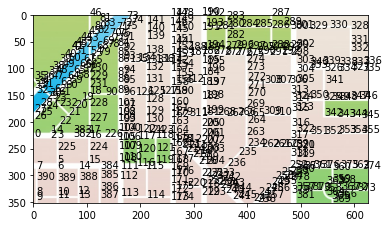

[Day:{0}, Count:{12}]
[Day:{1}, Count:{33}]
[Day:{2}, Count:{63}]
[Day:{3}, Count:{89}]
[Day:{4}, Count:{130}]
[Day:{5}, Count:{153}]
[Day:{6}, Count:{177}]
[Day:{7}, Count:{187}]
[Day:{8}, Count:{191}]
[Day:{9}, Count:{193}]
[Day:{10}, Count:{192}]
[Day:{11}, Count:{194}]
[12, 33, 63, 89, 130, 153, 177, 187, 191, 193, 192, 194]


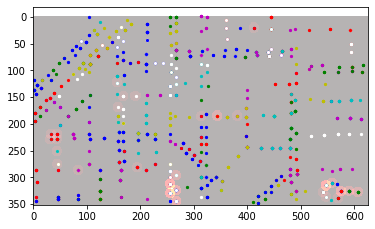

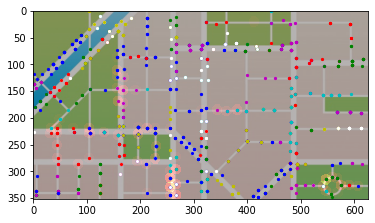

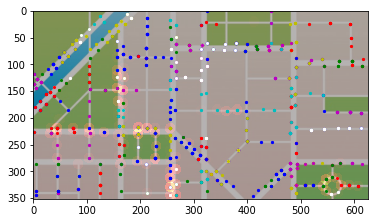

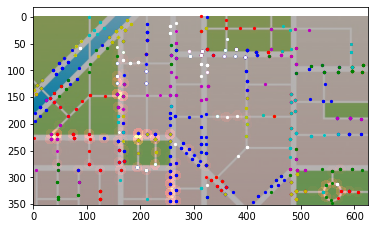

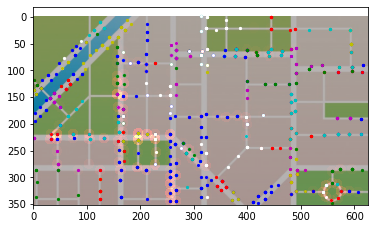

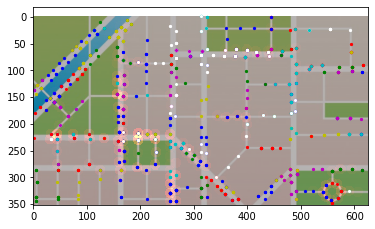

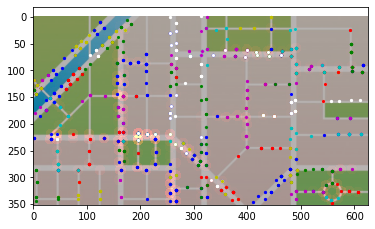

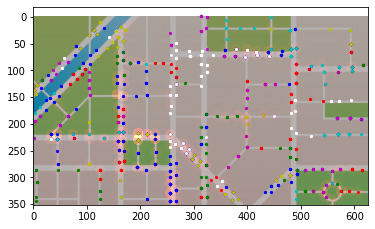

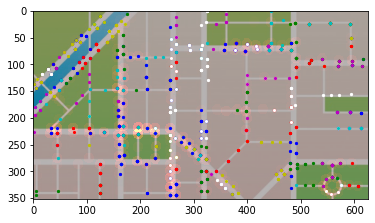

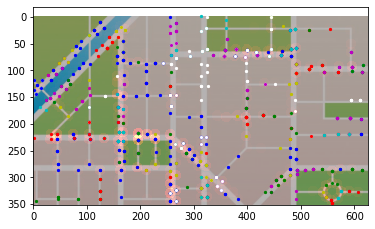

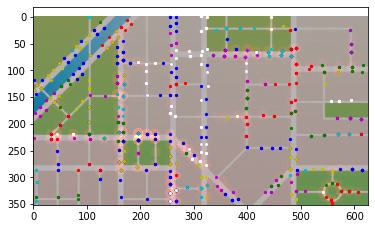

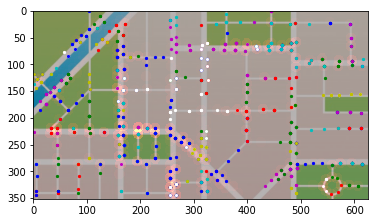

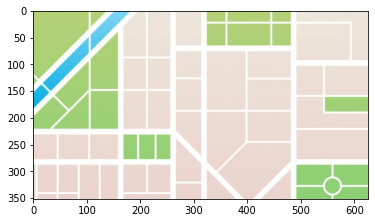

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

random.seed(669899879787987667)



ix = []
iy = []
def onclick(event):
    global ix, iy
    if(event.xdata==None or event.ydata==None):
        return
    ix.append(int(event.xdata))
    iy.append(int(event.ydata))
    print([int(event.xdata),int(event.ydata)])
    # plt.clf()
    plt.scatter(int(event.xdata),int(event.ydata)); #inform matplotlib of the new data
    plt.draw()
    return

class GoPoints:

    def __init__(self, x,y,name):
        self.forwardArray = []
        self.x = x
        self.y = y
        self.name = name
    def __str__(self):
        return self.name
    def append(self,point):
        if(type(point)==list):
            self.forwardArray+=point
        else:
            self.forwardArray.append(point)
    def forward(self):
        # print("Len: "+str(len(self.forwardArray)))
        # print(str(self.name))
        pt = random.choice(self.forwardArray)
        # print(type(pt))
        # print(self.forwardArray)

        # if(type(pt)==int):
        # print(random.choice(self.forwardArray).cords())
        return pt
    def cords(self):
        return [self.x,self.y]
class Person:
    def __init__(self, startPoint=None,infected = False):
        self.walked = []
        c = [True,False,False,False,False,False,False]
        self.infected = random.choice(c)
        self.immune= False
        # self.recoveable = False
        if(startPoint==None):
            global pts
            pt = random.choice(pts)
            self.point = pt
            self.walked.append(str(self.point))
        else:
            self.point = startPoint
    def update(self):
        c = [True,False,False,False]
        saved = random.choice(c)
        if(saved and self.infected):
            self.immune = True
            self.infected = False

        point = self.point.forward()
        #while str(point not in self.walked):
        #point = self.point.forward()
        self.point = point
        self.walked.append(str(self.point))

    def __str__(self):
        return str(self.point)
    def cords(self):
        return self.point.cords()
    def infected(self):
        if(self.immune):
            return False
        return self.infected
class Virus:
    def __init__(self, cords):
        self.infection = True
        self.day = random.randint(0,10)
        self.pt = cords
        c = [True,False]
        self.infection = random.choice(c)
    def InfectMe(self,cords):
        c = [True,False]
        if(self.pt== cords):
            return random.choice(c)
    def update(self):
        self.day-=1
        if(day==0):
            self.infection = False
    def show(self):
        if(v.infection):
            drawCircle(self.pt[0],self.pt[1])
img = cv2.imread("city.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grid = np.zeros([img.shape[0],img.shape[1]])
# print(img.shape)
# STOP
# grid[:] = np.nan
# fig, ax = plt.subplots()
# ax.imshow(img)

# cid = fig.canvas.mpl_connect('button_press_event', onclick)
# plt.show()
# print(ix)
# print(iy)
ix = [1, 33, 32, 44, 44, 45, 45, 5, 5, 5, 45, 45, 83, 84, 84, 104, 105, 104, 106, 91, 79, 65, 49, 39, 23, 13, 2, 2, 13, 23, 30, 14, 5, 1, 7, 1, 16, 27, 36, 48, 58, 72, 72, 79, 88, 103, 104, 33, 42, 54, 64, 77, 87, 99, 106, 106, 97, 91, 81, 69, 60, 47, 39, 51, 64, 74, 85, 93, 117, 129, 141, 154, 163, 174, 183, 171, 158, 147, 137, 121, 113, 124, 119, 131, 156, 156, 156, 156, 156, 156, 134, 167, 168, 168, 169, 169, 168, 168, 168, 168, 167, 158, 158, 158, 160, 158, 167, 160, 160, 169, 169, 163, 161, 163, 212, 211, 194, 196, 228, 228, 195, 230, 196, 228, 212, 213, 191, 236, 211, 211, 211, 211, 211, 211, 196, 181, 228, 243, 211, 212, 212, 212, 257, 257, 257, 256, 255, 256, 266, 266, 267, 267, 267, 267, 266, 266, 266, 257, 256, 255, 257, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 267, 266, 266, 266, 265, 265, 266, 314, 314, 313, 314, 314, 314, 292, 291, 316, 314, 314, 324, 323, 324, 324, 324, 327, 323, 323, 323, 323, 323, 323, 323, 314, 314, 314, 314, 312, 301, 290, 280, 276, 286, 297, 308, 314, 314, 314, 288, 322, 324, 324, 104, 44, 132, 104, 104, 104, 104, 104, 49, 342, 399, 382, 363, 332, 344, 350, 359, 371, 353, 360, 374, 382, 411, 420, 433, 444, 453, 463, 479, 480, 469, 458, 444, 433, 419, 480, 461, 446, 425, 397, 399, 397, 381, 361, 344, 397, 399, 399, 399, 397, 397, 396, 376, 356, 336, 359, 360, 341, 361, 360, 386, 412, 444, 444, 445, 467, 418, 440, 463, 465, 438, 416, 378, 399, 481, 481, 480, 489, 491, 491, 491, 491, 478, 451, 432, 429, 449, 291, 283, 481, 482, 482, 482, 480, 480, 491, 491, 491, 491, 489, 489, 542, 544, 595, 592, 516, 554, 593, 593, 515, 569, 615, 616, 595, 571, 540, 518, 545, 544, 568, 591, 612, 610, 593, 571, 556, 517, 518, 544, 569, 590, 613, 493, 491, 541, 558, 558, 523, 595, 547, 547, 557, 569, 575, 568, 558, 522, 507, 590, 606, 615, 574, 539, 507, 482, 482, 492, 491, 75, 74, 125, 125, 125, 125, 85, 44, 6]
iy = [227, 219, 229, 228, 219, 275, 286, 286, 336, 344, 336, 341, 334, 341, 286, 275, 229, 219, 147, 158, 172, 186, 203, 159, 174, 185, 194, 180, 168, 156, 151, 134, 145, 136, 128, 119, 119, 109, 100, 86, 77, 62, 62, 55, 45, 34, 0, 118, 107, 95, 84, 71, 58, 48, 71, 88, 98, 106, 116, 126, 135, 149, 142, 129, 118, 107, 95, 86, 62, 53, 38, 26, 19, 6, 14, 24, 37, 47, 59, 73, 24, 10, 32, 20, 56, 73, 87, 111, 123, 145, 148, 45, 65, 80, 108, 125, 149, 172, 185, 198, 216, 169, 185, 196, 216, 233, 233, 249, 272, 250, 270, 287, 305, 337, 340, 286, 281, 230, 228, 276, 254, 253, 218, 219, 219, 146, 148, 147, 161, 183, 198, 123, 102, 88, 85, 87, 87, 87, 69, 43, 28, 13, 89, 71, 53, 31, 18, 1, 0, 11, 27, 49, 62, 77, 95, 112, 125, 103, 129, 147, 166, 179, 190, 203, 220, 233, 243, 261, 275, 288, 299, 312, 329, 344, 344, 324, 296, 273, 237, 186, 146, 186, 155, 129, 110, 89, 72, 73, 64, 64, -1, 27, 0, 20, 61, 91, 104, 129, 153, 182, 206, 224, 238, 255, 278, 206, 224, 238, 252, 269, 258, 247, 236, 246, 254, 265, 278, 300, 320, 336, 319, 299, 314, 336, 251, 251, 227, 196, 169, 119, 104, 134, 168, 300, 244, 261, 281, 306, 316, 323, 331, 342, 307, 318, 328, 340, 346, 335, 327, 316, 305, 297, 285, 295, 306, 314, 328, 341, 348, 246, 246, 246, 246, 223, 201, 188, 185, 187, 185, 170, 151, 136, 120, 101, 87, 75, 74, 74, 72, 62, 21, 24, 42, 6, 21, 21, 22, 0, 61, 17, 72, 73, 72, 64, 65, 65, 61, 62, 74, 61, 25, 23, 59, 89, 105, 123, 126, 125, 125, 184, 186, 187, 124, 144, 160, 179, 207, 229, 263, 265, 248, 248, 217, 176, 156, 157, 104, 101, 25, 24, 22, 51, 66, 98, 104, 104, 91, 93, 93, 90, 92, 125, 188, 190, 190, 191, 155, 155, 157, 157, 153, 222, 221, 219, 219, 219, 286, 325, 327, 310, 288, 285, 285, 315, 336, 342, 339, 326, 313, 349, 325, 325, 325, 327, 287, 285, 285, 286, 308, 331, 293, 340, 227, 219, 287, 304, 325, 340, 308, 309, 308]

# iy = [197, 226, 163, 212, 137, 241, 275, 215]

fig, ax = plt.subplots()
ax.imshow(img)
# ax.scatter(ix,iy)

pts = []
for x,y in zip(ix,iy):
    pts.append(GoPoints(x,y,str(len(pts))))
    ax.annotate(str(pts[-1]), (x, y))
plt.show()

# pts[    0].append(point = [pts[1],pts[2]])
# plt.show()
def Distance(x,y,x1,y2):
    return ((x-x1)**2 + (y-y2)**2)**(1/2)
def drawCircle(x,y,r = 10):
    global grid
    for X in range(grid.shape[0]):
        for Y in range(grid.shape[1]):
            # print(Distance(X,Y,x,y))
            d = Distance(Y,X,x,y)
            if(d<r):
                grid[X][Y]+=100

initMarkers()
population = 200
color = ["b","g","r","c","m","y","b","w"]
Viruses = []

      
days = 12
people = []
for p in range(population):
    people.append(Person())
people[0].infected = True

Y = []
for day in range(days):
    for p in range(population):
        # i = Person()
        i = people[p]

        steps_taken_by_person = random.randint(3,10)
        for u in range(steps_taken_by_person):
            random.seed(int(random.random()*1000))
            # print(i)
            i.update()
            # print(i)

            for v in Viruses:
                if(v.InfectMe(i.cords())):
                    i.infected = True    
            coords = (i.cords())
            if(i.infected):
                # print("Infected: "+str(i))
                Viruses.append(Virus(coords))
                # drawCircle(coords[0],coords[1])
            
            
            plt.scatter(coords[0],coords[1],s=5,color=color[p%8])
    for v in Viruses:
        # print(v.infection)
        v.show()
        v.update()
    plt.imshow(grid,alpha = 0.3, cmap='hot', interpolation='nearest')
    fig, ax = plt.subplots()
    ax.imshow(img)
    count=0
    for p in range(population):
        if(people[p].infected==True):
            count+=1
    Y.append(count)
    print("[Day:{%d}, Count:{%d}]"%(day,count))
print(Y)




In [0]:
#1st observation Coronavirus Probab. doesnot matter

In [0]:
plt.savefig('test.png')

<Figure size 432x288 with 0 Axes>

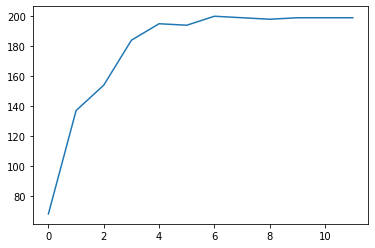

In [0]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

X = np.arange(0,12)
plt.plot(X,Y)
# plt.show()
plt.savefig("curve.png")

In [23]:
for i,x in enumerate(pts):
    if((x).len()==0):
        print(i)

42


In [0]:

def initMarkers():
	global pts
	pts[0].append([pts[1],pts[2]])
	pts[1].append([pts[0],pts[2],pts[22],pts[4],pts[3]])
	pts[2].append([pts[1],pts[0],pts[4],pts[3]])
	pts[3].append([pts[1],pts[2],pts[3],pts[4],pts[225],pts[383],pts[382]])
	pts[4].append([pts[1],pts[2],pts[3],pts[383],pts[382]])
	pts[5].append([pts[6],pts[225]])
	pts[6].append([pts[7],pts[14],pts[5]])
	pts[7].append([pts[390],pts[6]])
	pts[8].append([pts[9],pts[390],pts[10],pts[11]])
	pts[9].append([pts[8],pts[11],pts[10]])
	pts[10].append([pts[11],pts[8],pts[9],pts[389],pts[12],pts[13]])
	pts[11].append([pts[10],pts[8],pts[9],pts[12],pts[13]])
	pts[12].append([pts[13],pts[10],pts[11],pts[388]])
	pts[13].append([pts[12],pts[10],pts[11]])
	pts[14].append([pts[6],pts[15],pts[388],pts[5]])
	pts[15].append([pts[224],pts[14],pts[384]])
	pts[16].append([pts[17],pts[382],pts[383],pts[226]])
	pts[17].append([pts[16],pts[382],pts[383],pts[226],pts[227]])
	pts[18].append([pts[19],pts[231],pts[90]])
	pts[19].append([pts[20],pts[18]])
	pts[20].append([pts[21],pts[19]])
	pts[21].append([pts[20],pts[232],pts[22],pts[232]])
	pts[22].append([pts[21],pts[1]])
	pts[23].append([pts[232],pts[30],pts[61],pts[24]])
	pts[24].append([pts[25],pts[28],pts[23],pts[29]])
	pts[25].append([pts[24],pts[27],pts[26],pts[28]])
	pts[26].append([pts[25],pts[27]])
	pts[27].append([pts[26],pts[25],pts[28]])
	pts[28].append([pts[29],pts[24],pts[27]])
	pts[29].append([pts[30],pts[28],pts[23]])
	pts[30].append([pts[31],pts[62],pts[29],pts[23]])
	pts[31].append([pts[30],pts[32],pts[34],pts[33]])
	pts[32].append([pts[33],pts[31],pts[34]])
	pts[33].append([pts[34],pts[32],pts[31]])
	pts[34].append([pts[33],pts[31],pts[35],pts[36]])
	pts[35].append([pts[34]])
	pts[36].append([pts[34],pts[31],pts[47],pts[37]])
	pts[37].append([pts[36],pts[38],pts[47],pts[48]])
	pts[38].append([pts[39],pts[38],pts[47],pts[48],pts[49],pts[37]])
	pts[39].append([pts[38],pts[48],pts[49],pts[50],pts[40]])
	pts[40].append([pts[50],pts[39],pts[49],pts[41],pts[51]])
	pts[41].append([pts[40],pts[50],pts[51],pts[52],pts[43]])
	pts[42]=pts[41]
	pts[43].append([pts[41],pts[51],pts[52],pts[53],pts[44]])
	pts[44].append([pts[43],pts[52],pts[53],pts[45]])
	pts[45].append([pts[44],pts[53],pts[52],pts[80],pts[82],pts[46]])
	pts[46].append([pts[45]])
	pts[47].append([pts[36],pts[37],pts[31],pts[38],pts[48]])
	pts[48].append([pts[47],pts[37],pts[49],pts[38],pts[39]])
	pts[49].append([pts[48],pts[38],pts[39],pts[40],pts[50]])
	pts[50].append([pts[49],pts[30],pts[40],pts[41],pts[51]])
	pts[51].append([pts[50],pts[40],pts[41],pts[43],pts[52]])
	pts[52].append([pts[51],pts[41],pts[43],pts[44],pts[53]])
	pts[53].append([pts[52],pts[43],pts[44],pts[45],pts[82],pts[54]])
	# pts[54].append([pts[52],pts[43],pts[44],pts[45],pts[82],pts[54]])
	pts[54].append([pts[67],pts[55],pts[79],pts[68],pts[53]])
	pts[55].append([pts[56],pts[67],pts[54],pts[79],pts[68],pts[230]])
	pts[56].append([pts[57],pts[66],pts[67],pts[55]])
	pts[57].append([pts[56],pts[66],pts[67],pts[58],pts[65]])
	pts[58].append([pts[65],pts[57],pts[66],pts[64],pts[59]])
	pts[59].append([pts[58],pts[65],pts[64],pts[63],pts[60]])
	pts[60].append([pts[63],pts[64],pts[59],pts[61],pts[62]])
	pts[61].append([pts[62],pts[60],pts[63],pts[23],pts[30]])
	pts[62].append([pts[30],pts[23],pts[63],pts[60]])
	pts[63].append([pts[63],pts[64],pts[59],pts[61],pts[62]])
	pts[64].append([pts[63],pts[60],pts[59],pts[58],pts[65]])
	pts[65].append([pts[64],pts[59],pts[58],pts[57],pts[66]])
	pts[66].append([pts[65],pts[58],pts[57],pts[56],pts[67]])
	pts[67].append([pts[66],pts[56],pts[54],pts[55]])
	pts[68].append([pts[79],pts[54],pts[69],pts[78]])
	pts[69].append([pts[68],pts[79],pts[78],pts[77],pts[70]])
	pts[70].append([pts[69],pts[78],pts[77],pts[76],pts[71]])
	pts[71].append([pts[70],pts[77],pts[76],pts[75],pts[72]])
	pts[72].append([pts[71],pts[76],pts[75],pts[74],pts[73]])
	pts[73].append([pts[72],pts[75],pts[74]])
	pts[74].append([pts[73],pts[72],pts[75]])
	pts[75].append([pts[76],pts[91],pts[72],pts[71]])
	pts[76].append([pts[71],pts[70],pts[75],pts[72],pts[84],pts[91]])
	pts[77].append([pts[69],pts[78],pts[70],pts[71],pts[76]])
	pts[78].append([pts[79],pts[68],pts[69],pts[70],pts[77]])
	pts[79].append([pts[55],pts[54],pts[68],pts[69],pts[78]])
	pts[80].append([pts[45],pts[82],pts[83],pts[81]])
	pts[81].append([pts[80],pts[83],pts[82]])
	pts[82].append([pts[45],pts[80],pts[83]])
	pts[83].append([pts[81],pts[82],pts[80]])
	pts[84].append([pts[76],pts[91],pts[92],pts[85]])
	pts[85].append([pts[84],pts[92],pts[93],pts[86]])
	pts[86].append([pts[85],pts[93],pts[135],pts[87],pts[94]])
	pts[87].append([pts[86],pts[94],pts[88],pts[95]])
	pts[88].append([pts[87],pts[94],pts[95],pts[96],pts[89]])
	pts[89].append([pts[88],pts[95],pts[96],pts[97],pts[101]])
	pts[90].append([pts[18],pts[89]])
	pts[91].append([pts[75],pts[76],pts[84],pts[85],pts[92]])
	pts[92].append([pts[91],pts[84],pts[85],pts[86],pts[93]])
	pts[93].append([pts[92],pts[85],pts[86],pts[94],pts[135]])
	pts[94].append([pts[135],pts[93],pts[86],pts[87],pts[88],pts[89],pts[96]])
	pts[95].append([pts[94],pts[87],pts[88],pts[89],pts[96]])
	pts[96].append([pts[95],pts[88],pts[89],pts[101],pts[97],pts[126]])
	pts[97].append([pts[96],pts[89],pts[101],pts[102],pts[103],pts[99]])
	pts[98].append([pts[97],pts[101],pts[102],pts[103],pts[99]])
	pts[99].append([pts[98],pts[102],pts[103],pts[104],pts[100]])
	pts[100].append([pts[104],pts[106],pts[105],pts[122],pts[226],pts[117]])
	pts[101].append([pts[102],pts[97],pts[98],pts[96],pts[89]])
	pts[102].append([pts[101],pts[97],pts[98],pts[99],pts[103]])
	pts[103].append([pts[102],pts[98],pts[99],pts[100],pts[104]])
	pts[104].append([pts[103],pts[99],pts[100],pts[105],pts[106],pts[226],pts[122]])
	pts[105].append([pts[104],pts[100],pts[226],pts[107],pts[106],pts[109]])
	pts[106].append([pts[117],pts[122],pts[100],pts[104],pts[105]])
	pts[107].append([pts[105],pts[106],pts[109],pts[110],pts[108]])
	pts[108].append([pts[107],pts[109],pts[110],pts[111],pts[104]])
	pts[109].append([pts[106],pts[105],pts[107],pts[108],pts[110]])
	pts[110].append([pts[107],pts[109],pts[108],pts[111],pts[116],pts[384]])
	pts[111].append([pts[108],pts[110],pts[112],pts[116],pts[384]])
	pts[112].append([pts[111],pts[113]])
	pts[113].append([pts[112],pts[114]])
	pts[114].append([pts[113],pts[115],pts[173]])
	pts[115].append([pts[116],pts[119]])
	pts[116].append([pts[111],pts[115],pts[108]])
	pts[117].append([pts[120],pts[106],pts[122],pts[124],pts[118]])
	pts[118].append([pts[123],pts[124],pts[122],pts[117],pts[121],pts[165]])
	pts[119].append([pts[121],pts[115],pts[116],pts[168]])
	pts[120].append([pts[117],pts[116]])
	pts[121].append([pts[118],pts[119]])
	pts[122].append([pts[124],pts[100],pts[117]])
	pts[123].append([pts[124],pts[118],pts[164]])
	pts[124].append([pts[122],pts[117],pts[118],pts[123]])
	pts[125].append([pts[131],pts[126],pts[127]])
	pts[126].append([pts[96],pts[125]])
	pts[127].append([pts[159],pts[125]])
	pts[128].append([pts[125],pts[129]])
	pts[129].append([pts[128],pts[130]])
	pts[130].append([pts[124],pts[129]])
	pts[131].append([pts[132],pts[125]])
	pts[132].append([pts[133],pts[131]])
	pts[133].append([pts[134],pts[136],pts[138],pts[132]])
	pts[134].append([pts[135],pts[133]])
	pts[135].append([pts[134],pts[93]])
	pts[136].append([pts[137],pts[133]])
	pts[137].append([pts[142],pts[136]])
	pts[138].append([pts[139],pts[133]])
	pts[139].append([pts[140],pts[138]])
	pts[140].append([pts[139],pts[141]])
	pts[141].append([pts[140]])
	pts[142].append([pts[137],pts[157],pts[154],pts[143],pts[153]])
	pts[143].append([pts[144],pts[145],pts[151],pts[152],pts[153],pts[142]])
	pts[144].append([pts[151],pts[145],pts[152],pts[143]])
	pts[145].append([pts[150],pts[146],pts[144],pts[151]])
	pts[146].append([pts[147],pts[149],pts[150],pts[151],pts[144]])
	# pts[147].append([pts[10],pts[146],pts[144],pts[151]])
	pts[147].append([pts[148],pts[149],pts[146]])
	pts[148].append([pts[149],pts[147]])
	pts[149].append([pts[148],pts[147],pts[146],pts[150]])
	pts[150].append([pts[145],pts[149],pts[146],pts[151],pts[144]])
	pts[151].append([pts[150],pts[145],pts[144],pts[152]])
	pts[152].append([pts[151],pts[144],pts[143],pts[153],pts[188],pts[187]])
	pts[153].append([pts[152],pts[143],pts[187],pts[142]])
	pts[154].append([pts[153],pts[142],pts[157],pts[155]])
	pts[155].append([pts[154],pts[157],pts[156],pts[158]])
	pts[156].append([pts[155],pts[158],pts[312],pts[180]])
	pts[156].append([pts[155],pts[158],pts[312],pts[180]])
	pts[157].append([pts[142],pts[154],pts[155],pts[156],pts[158]])
	pts[158].append([pts[157],pts[156],pts[155],pts[180],pts[159]])
	pts[159].append([pts[158],pts[180],pts[160]])
	pts[160].append([pts[159],pts[180],pts[161]])
	pts[161].append([pts[162],pts[179],pts[160]])
	pts[162].append([pts[161],pts[179],pts[163]])
	pts[163].append([pts[164],pts[162]])
	pts[164].append([pts[123],pts[118],pts[165],pts[178]])
	pts[165].append([pts[164],pts[178],pts[166],pts[212]])
	pts[166].append([pts[165],pts[118],pts[167]])
	pts[167].append([pts[166],pts[168],pts[177]])
	pts[168].append([pts[119],pts[169],pts[167],pts[177]])
	pts[169].append([pts[119],pts[168],pts[177],pts[176],pts[170]])
	pts[170].append([pts[169],pts[176],pts[171]])
	pts[171].append([pts[170],pts[175],pts[172]])
	pts[172].append([pts[171],pts[175],pts[173],pts[174]])
	pts[173].append([pts[172],pts[174],pts[114],pts[175]])
	pts[174].append([pts[173],pts[175],pts[172]])
	pts[175].append([pts[171],pts[172],pts[174]])
	pts[176].append([pts[169],pts[170],pts[171],pts[175]])
	pts[177].append([pts[167],pts[168],pts[169],pts[176]])
	pts[178].append([pts[165],pts[212],pts[213]])
	pts[179].append([pts[161],pts[162],pts[311]])
	pts[180].append([pts[156],pts[158],pts[159],pts[160]])
	pts[181].append([pts[199],pts[311],pts[205],pts[268]])
	pts[182].append([pts[183],pts[197],pts[198],pts[199],pts[181]])
	pts[183].append([pts[184],pts[312],pts[197],pts[182],pts[198]])
	pts[184].append([pts[183],pts[196],pts[195],pts[185]])
	pts[185].append([pts[186],pts[195],pts[196],pts[184]])
	pts[186].append([pts[189],pts[188],pts[187],pts[278],pts[194],pts[195],pts[185]])
	pts[187].append([pts[152],pts[153],pts[188],pts[186],pts[189]])
	pts[188].append([pts[152],pts[153],pts[187],pts[186],pts[189]])
	pts[189].append([pts[194],pts[186],pts[187],pts[188],pts[194]])
	pts[190].append([pts[192],pts[193],pts[191],pts[186],pts[189]])
	pts[191].append([pts[190],pts[192],pts[193],pts[194],pts[189]])
	pts[192].append([pts[190],pts[193],pts[191]])
	pts[193].append([pts[192],pts[190],pts[191],pts[194],pts[281]])
	pts[194].append([pts[191],pts[193],pts[189],pts[186],pts[278]])
	pts[195].append([pts[186],pts[185],pts[196]])
	pts[196].append([pts[195],pts[185],pts[184],pts[197],pts[183]])
	pts[197].append([pts[196],pts[184],pts[183],pts[182],pts[198]])
	pts[198].append([pts[197],pts[183],pts[182],pts[181],pts[199]])
	pts[199].append([pts[198],pts[182],pts[181],pts[205],pts[200],pts[268]])
	pts[200].append([pts[199],pts[205],pts[181],pts[206],pts[207],pts[202]])
	pts[201].append([pts[200],pts[205],pts[206],pts[207],pts[202]])
	pts[202].append([pts[201],pts[206],pts[207],pts[208],pts[203]])
	pts[203].append([pts[202],pts[207],pts[208],pts[209],pts[204]])
	pts[204].append([pts[203],pts[208],pts[209],pts[216],pts[217],pts[221],pts[223]])
	pts[205].append([pts[181],pts[200],pts[206],pts[201],pts[199]])
	pts[206].append([pts[205],pts[200],pts[201],pts[202],pts[207]])
	pts[207].append([pts[206],pts[201],pts[202],pts[203],pts[209]])
	pts[208].append([pts[207],pts[202],pts[203],pts[209],pts[204]])
	pts[209].append([pts[210],pts[215],pts[216],pts[204],pts[207]])
	pts[210].append([pts[211],pts[214],pts[215],pts[216],pts[209]])
	pts[211].append([pts[212],pts[213],pts[214],pts[215],pts[210]])
	pts[212].append([pts[164],pts[213],pts[214],pts[211],pts[178]])
	pts[213].append([pts[178],pts[212],pts[211],pts[214]])
	pts[214].append([pts[213],pts[212],pts[210],pts[215]])
	pts[215].append([pts[214],pts[211],pts[210],pts[209],pts[216]])
	pts[216].append([pts[215],pts[210],pts[209],pts[204]])
	pts[217].append([pts[204],pts[221],pts[222],pts[218]])
	pts[218].append([pts[220],pts[217],pts[222],pts[219],pts[223]])
	pts[219].append([pts[223],pts[218]])
	pts[220].append([pts[175],pts[218]])
	pts[221].append([pts[217],pts[222],pts[237],pts[233],pts[204],pts[216]])
	pts[222].append([pts[221],pts[217],pts[218],pts[219],pts[223]])
	pts[223].append([pts[218]])
	pts[224].append([pts[16],pts[15]])
	pts[225].append([pts[3],pts[5]])
	pts[226].append([pts[17],pts[16],pts[104],pts[105]])
	pts[227].append([pts[228],pts[17]])
	pts[228].append([pts[18],pts[227]])
	pts[229].append([pts[230],pts[231]])
	pts[230].append([pts[55],pts[229]])
	pts[231].append([pts[229],pts[18]])
	pts[232].append([pts[23],pts[21]])
	pts[233].append([pts[242],pts[237],pts[238],pts[221],pts[236]])
	pts[234].append([pts[263],pts[235],pts[262]])
	pts[235].append([pts[234],pts[236]])
	pts[236].append([pts[235],pts[233]])
	pts[237].append([pts[221],pts[233],pts[238],pts[242]])
	pts[238].append([pts[237],pts[233],pts[239],pts[242],pts[243]])
	pts[239].append([pts[242],pts[233],pts[243],pts[240],pts[244]])
	pts[240].append([pts[239],pts[243],pts[244],pts[245],pts[241]])
	pts[241].append([pts[245],pts[244]])
	pts[242].append([pts[233],pts[237],pts[238],pts[239],pts[243]])
	pts[243].append([pts[242],pts[240],pts[238],pts[239],pts[244]])
	pts[244].append([pts[243],pts[240],pts[239],pts[241],pts[245]])
	pts[245].append([pts[241],pts[244],pts[240]])
	pts[246].append([pts[258],pts[247],pts[257]])
	pts[247].append([pts[246],pts[258],pts[257],pts[248],pts[256]])
	pts[248].append([pts[256],pts[247],pts[257],pts[249]])
	pts[249].append([pts[248],pts[256],pts[255],pts[250]])
	pts[250].append([pts[249],pts[255],pts[254],pts[251]])
	pts[251].append([pts[250],pts[255],pts[254],pts[253],pts[252]])
	pts[252].append([pts[251],pts[253],pts[356],pts[380],pts[319]])
	pts[253].append([pts[252],pts[251],pts[254],pts[378],pts[380],pts[356]])
	pts[254].append([pts[253],pts[251],pts[255],pts[250]])
	pts[255].append([pts[254],pts[251],pts[249],pts[250],pts[256]])
	pts[256].append([pts[249],pts[251],pts[255],pts[250],pts[248],pts[247]])
	pts[257].append([pts[256],pts[248],pts[247],pts[246],pts[258]])
	pts[258].append([pts[257],pts[247],pts[246]])
	pts[259].append([pts[317],pts[320],pts[318],pts[260]])
	pts[260].append([pts[259],pts[261]])
	pts[261].append([pts[260],pts[262]])
	pts[262].append([pts[234],pts[261]])
	pts[263].append([pts[234],pts[264]])
	pts[264].append([pts[263],pts[265]])
	pts[265].append([pts[266],pts[309],pts[269],pts[264]])
	pts[266].append([pts[267],pts[265]])
	pts[267].append([pts[268],pts[266]])
	pts[268].append([pts[119],pts[267]])
	pts[269].append([pts[265],pts[270]])
	pts[270].append([pts[269],pts[271]])
	pts[271].append([pts[270],pts[272],pts[308]])
	pts[272].append([pts[271],pts[273],pts[308]])
	pts[273].append([pts[272],pts[274]])
	pts[274].append([pts[275],pts[272]])
	pts[275].append([pts[276],pts[296],pts[297],pts[295],pts[290]])
	pts[276].append([pts[277],pts[279],pts[296],pts[297],pts[275]])
	pts[277].append([pts[278],pts[279],pts[296],pts[276]])
	pts[278].append([pts[194],pts[277],pts[279]])
	pts[279].append([pts[282],pts[277],pts[296],pts[278],pts[276]])
	pts[280].append([pts[281],pts[283],pts[284],pts[282]])
	pts[281].append([pts[280],pts[193]])
	pts[282].append([pts[280],pts[279]])
	pts[283].append([pts[280]])
	pts[284].append([pts[280],pts[285]])
	pts[285].append([pts[284],pts[286]])
	pts[286].append([pts[287],pts[288]])
	pts[287].append([pts[286]])
	pts[288].append([pts[294],pts[293],pts[291],pts[292],pts[286]])
	pts[289].append([pts[286],pts[300]])
	pts[290].append([pts[275],pts[296],pts[297],pts[295],pts[294],pts[291]])
	pts[291].append([pts[293],pts[295],pts[292],pts[295],pts[294],pts[290],pts[288]])
	# pts[292].append([pts[293],pts[295],pts[292],pts[295],pts[294],pts[290],pts[288]])
	pts[292].append([pts[291],pts[294],pts[293],pts[299],pts[298]])
	pts[293].append([pts[291],pts[294],pts[292],pts[299],pts[298],pts[288]])
	pts[294].append([pts[291],pts[288],pts[293],pts[292],pts[290],pts[295]])		
	pts[295].append([pts[297],pts[275],pts[290],pts[291],pts[294]])
	pts[296].append([pts[279],pts[277],pts[276],pts[275],pts[297]])
	pts[297].append([pts[276],pts[296],pts[290],pts[275],pts[295]])
	pts[298].append([pts[292],pts[293],pts[299],pts[303],pts[302]])
	pts[299].append([pts[293],pts[298],pts[302],pts[292],pts[300]])
	pts[300].append([pts[299],pts[302],pts[301],pts[289]])
	pts[301].append([pts[300],pts[302],pts[309],pts[299]])
	pts[302].append([pts[301],pts[299],pts[298],pts[303]])
	pts[303].append([pts[298],pts[302],pts[304]])
	pts[304].append([pts[303],pts[305],pts[333],pts[340]])
	pts[305].append([pts[306],pts[304],pts[313]])
	pts[306].append([pts[305],pts[304],pts[307]])
	pts[307].append([pts[308],pts[306]])
	pts[308].append([pts[272],pts[271],pts[307]])
	pts[309].append([pts[265],pts[310]])
	pts[310].append([pts[309],pts[315]])
	pts[311].append([pts[179],pts[181]])
	pts[312].append([pts[156],pts[183]])
	pts[313].append([pts[306],pts[314],pts[324],pts[305]])
	pts[314].append([pts[313],pts[315],pts[323],pts[324]])
	pts[315].append([pts[314],pts[323],pts[316],pts[310]])
	pts[316].append([pts[315],pts[317],pts[322],pts[310]])
	pts[316].append([pts[315],pts[317],pts[322],pts[310]])
	pts[317].append([pts[259],pts[320],pts[322],pts[316]])
	pts[318].append([pts[259],pts[319],pts[252],pts[356]])
	pts[319].append([pts[320],pts[318],pts[259],pts[252],pts[356]])
	pts[320].append([pts[317],pts[318],pts[259],pts[252],pts[319]])
	pts[321]=pts[320]
	pts[322].append([pts[316],pts[317],pts[351]])
	pts[323].append([pts[316],pts[315],pts[314],pts[324],pts[322]])
	pts[324].append([pts[313],pts[314],pts[315],pts[323]])
	pts[325].append([pts[341],pts[350],pts[349],pts[342]])
	pts[326].append([pts[333],pts[340],pts[339],pts[338],pts[334],pts[341]])		
	pts[327].append([pts[338],pts[334],pts[337],pts[336],pts[335]])		
	pts[328].append([pts[330],pts[331]])		
	pts[329].append([pts[301],pts[330]])
	pts[330].append([pts[329],pts[328]])
	pts[331].append([pts[328],pts[332]])
	pts[332].append([pts[331],pts[337]])
	pts[332].append([pts[331],pts[337]])
	pts[333].append([pts[304],pts[303],pts[340],pts[339],pts[326]])
	pts[334].append([pts[326],pts[339],pts[338],pts[337],pts[327]])
	pts[335].append([pts[327],pts[336],pts[337]])
	pts[336].append([pts[327],pts[335],pts[337]])
	pts[337].append([pts[332],pts[338],pts[336],pts[334],pts[327],pts[335]])
	pts[338].append([pts[329],pts[326],pts[334],pts[327],pts[337]])
	pts[339].append([pts[340],pts[333],pts[326],pts[334],pts[338]])
	pts[340].append([pts[303],pts[304],pts[333],pts[339],pts[326]])
	pts[341].append([pts[326],pts[325]])
	pts[342].append([pts[325],pts[343]])
	pts[343].append([pts[343],pts[344]])
	pts[344].append([pts[343],pts[345]])
	pts[345].append([pts[344]])	

	pts[346].append([pts[347]])	
	pts[347].append([pts[346],pts[348]])
	pts[348].append([pts[349],pts[347]])
	pts[349].append([pts[325],pts[348]])
	pts[350].append([pts[324],pts[325]])
	pts[351].append([pts[332],pts[352]])
	pts[352].append([pts[351],pts[353]])
	pts[353].append([pts[352],pts[354]])
	pts[354].append([pts[353],pts[355]])
	pts[355].append([pts[354]])
	pts[356].append([pts[380],pts[377],pts[252],pts[253],pts[319]])
	pts[357].append([pts[381],pts[379],pts[378],pts[371],pts[380]])
	pts[358].append([pts[370],pts[364],pts[363]])
	pts[359].append([pts[363],pts[368],pts[360]])
	pts[360].append([pts[376],pts[375],pts[359]])
	pts[361].append([pts[377],pts[376]])
	pts[362].append([pts[375],pts[374]])
	pts[363].append([pts[358],pts[359]])
	pts[364].append([pts[358],pts[365]])
	pts[365].append([pts[366],pts[364],pts[369]])
	pts[366].append([pts[365],pts[367]])
	pts[367].append([pts[366],pts[368],pts[372]])
	pts[368].append([pts[359],pts[367]])
	pts[369].append([pts[365]])
	pts[370].append([pts[371],pts[358]])
	pts[371].append([pts[370],pts[357]])
	pts[372].append([pts[367],pts[373]])
	pts[373].append([pts[372]])
	pts[374].append([pts[362]])
	pts[375].append([pts[362],pts[360]])
	pts[376].append([pts[361],pts[360]])
	pts[377].append([pts[361],pts[356]])
	pts[378].append([pts[253],pts[379],pts[380],pts[357]])
	pts[379].append([pts[357],pts[381],pts[378]])
	pts[380].append([pts[356],pts[252],pts[253],pts[378],pts[357]])
	pts[381].append([pts[357],pts[379]])
	pts[382].append([pts[3],pts[16],pts[4],pts[17],pts[383]])
	pts[383].append([pts[3],pts[16],pts[4],pts[17],pts[382]])
	pts[384].append([pts[110],pts[111],pts[385],pts[15]])
	pts[385].append([pts[384],pts[386]])
	pts[386].append([pts[385],pts[387]])
	pts[387].append([pts[386]])
	pts[388].append([pts[14],pts[12]])
	pts[389].append([pts[6],pts[10]])
	pts[390].append([pts[7],pts[8]])